In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
path = r'C:\Users\piotr\Desktop\projekt_WUM_SAR\dataset'

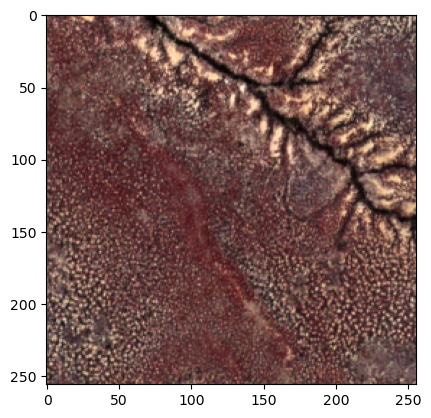

In [8]:
from PIL import Image
img_test_path = r'C:\Users\piotr\Desktop\projekt_WUM_SAR\OPTICAL\gory\ROIs1970_fall_s2_2_p1.png'
image = Image.open(img_test_path)
plt.imshow(image)
plt.show()

# Model for optical images 

## Splitting the data

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

datagen = ImageDataGenerator(
    rescale=1./255,  # Normalizacja wartości pikseli
    validation_split=0.2  # 20% danych na walidację
)

base_dir_optical = r'C:\Users\piotr\Desktop\projekt_WUM_SAR\OPTICAL'

datagen_train = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)
datagen_test = ImageDataGenerator(rescale=1./255)

print("Dla zbioru treningowego:")
train_generator_optical = datagen_train.flow_from_directory(
    os.path.join(base_dir_optical, 'train'),
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb'
)

print("Dla zbioru walidacyjnego")
validation_generator_optical = datagen_val.flow_from_directory(
    os.path.join(base_dir_optical, 'val'),
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb'
)

print("Dla zbioru testowego")
test_generator_optical = datagen_test.flow_from_directory(
    os.path.join(base_dir_optical, 'test'),
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False  
)

Dla zbioru treningowego:
Found 11200 images belonging to 4 classes.
Dla zbioru walidacyjnego
Found 3200 images belonging to 4 classes.
Dla zbioru testowego
Found 1600 images belonging to 4 classes.


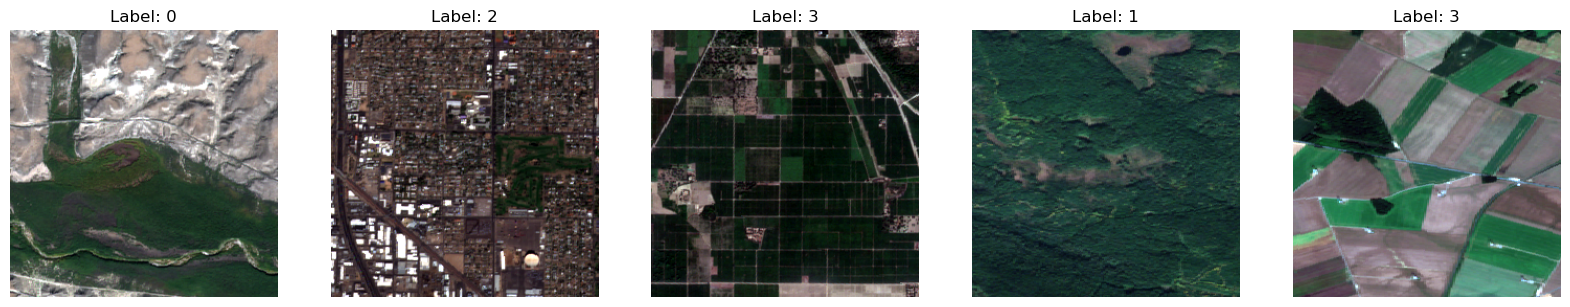

In [27]:
images, labels = next(train_generator_optical)
n = 5  
plt.figure(figsize=(20, 10))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(images[i])
    plt.title('Label: ' + str(np.argmax(labels[i])))
    plt.axis('off')
plt.show()

In [28]:
print("Mapowanie indeksów klas:", train_generator_optical.class_indices)

Mapowanie indeksów klas: {'gory': 0, 'lasy': 1, 'miasto': 2, 'pola': 3}


### Model CNN for optical images

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping

model_optical = Sequential([
    Input(shape=(256, 256, 3)),
    Conv2D(filters=64, kernel_size=3, activation="relu", kernel_regularizer=l1(0.01)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(filters=64, kernel_size=3, activation="relu", kernel_regularizer=l1(0.01)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

model_optical.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history_optical = model_optical.fit(train_generator_optical, validation_data=validation_generator_optical, epochs=10, 
                                    callbacks=[early_stopping])

Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 387s 1s/step - accuracy: 0.6078 - loss: 8.4839 - val_accuracy: 0.7991 - val_loss: 1.4176
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 394s 1s/step - accuracy: 0.8448 - loss: 1.1452 - val_accuracy: 0.8675 - val_loss: 0.7896
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 387s 1s/step - accuracy: 0.8647 - loss: 0.7664 - val_accuracy: 0.8769 - val_loss: 0.6658
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 382s 1s/step - accuracy: 0.8850 - loss: 0.6351 - val_accuracy: 0.7909 - val_loss: 0.7997
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.8910 - loss: 0.5574 - val_accuracy: 0.8675 - val_loss: 0.5659
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 380s 1s/step - accuracy: 0.9057 - loss: 0.4839 - val_accuracy: 0.8706 - val_loss: 0.5388
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 380s 1s/step - accuracy: 0.9234 - loss: 0.4137 - val_accuracy: 0.8672 - val_loss: 0.5316
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 389s 1s/step - accuracy: 0.9289 - loss: 0.3786 - val_accu

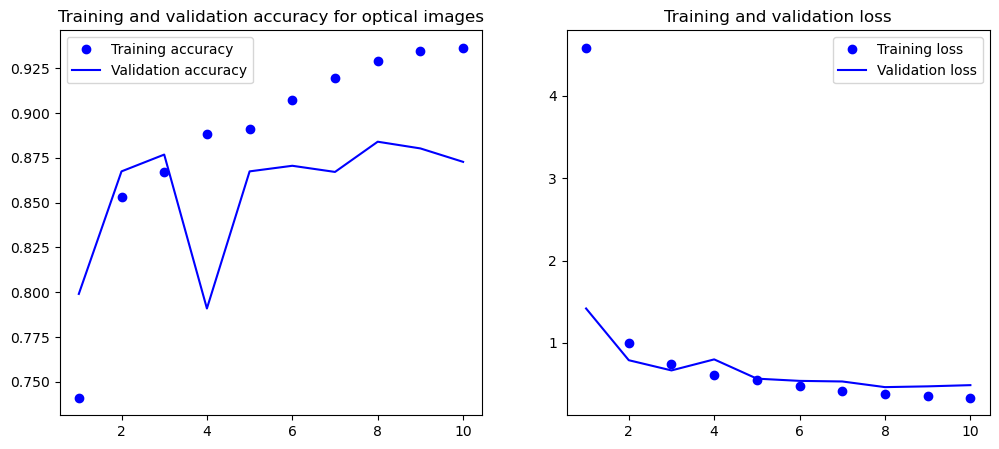

In [30]:
accuracy = history_optical.history["accuracy"]
val_accuracy = history_optical.history["val_accuracy"]
loss = history_optical.history["loss"]
val_loss = history_optical.history["val_loss"] 

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy for optical images')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
test_loss, test_accuracy = model_optical.evaluate(test_generator_optical)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 242ms/step - accuracy: 0.9411 - loss: 0.3769
Test Loss: 0.4790930151939392
Test Accuracy: 0.8843749761581421


### Referential model for optical images

In [34]:
simple_model = Sequential([
    Input(shape=(256, 256, 3)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

simple_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history_simple = simple_model.fit(train_generator_optical, validation_data=validation_generator_optical, epochs=10, 
                                  callbacks=[early_stopping])

Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 91s 256ms/step - accuracy: 0.3921 - loss: 22.1098 - val_accuracy: 0.3800 - val_loss: 11.1824
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 81s 229ms/step - accuracy: 0.5324 - loss: 3.9948 - val_accuracy: 0.4984 - val_loss: 1.9355
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 80s 228ms/step - accuracy: 0.5598 - loss: 2.9069 - val_accuracy: 0.5269 - val_loss: 1.4618
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 84s 238ms/step - accuracy: 0.5988 - loss: 1.9566 - val_accuracy: 0.5587 - val_loss: 1.6608
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 83s 237ms/step - accuracy: 0.5937 - loss: 1.3372 - val_accuracy: 0.4834 - val_loss: 1.2225
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 81s 231ms/step - accuracy: 0.6233 - loss: 1.0047 - val_accuracy: 0.5731 - val_loss: 0.9527
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 82s 232ms/step - accuracy: 0.5790 - loss: 0.9029 - val_accuracy: 0.5066 - val_loss: 0.9386
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 82s 234ms/step - accuracy: 0.5807 - loss:

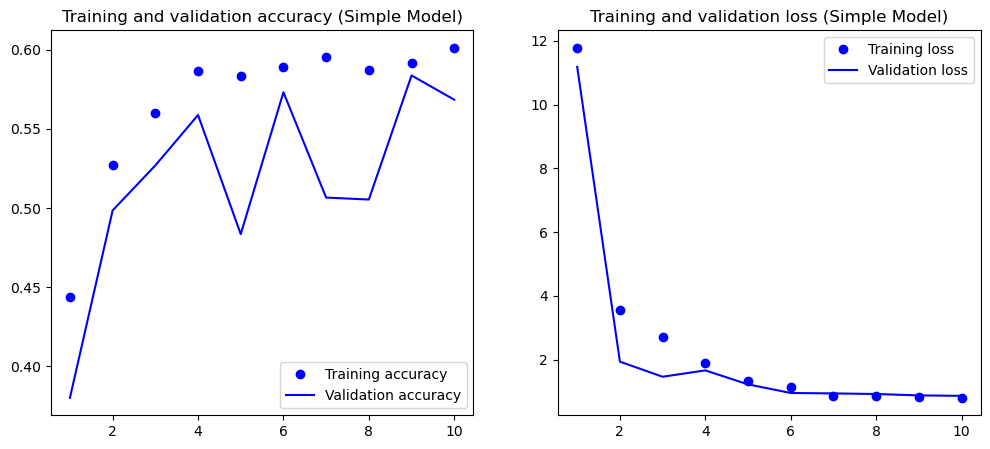

In [35]:
accuracy = history_simple.history['accuracy']
val_accuracy = history_simple.history['val_accuracy']
loss = history_simple.history['loss']
val_loss = history_simple.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy (Simple Model)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss (Simple Model)')
plt.legend()

plt.show()


In [36]:
test_loss, test_accuracy = simple_model.evaluate(test_generator_optical)
print(f"Test Loss (Simple Model): {test_loss}")
print(f"Test Accuracy (Simple Model): {test_accuracy}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.7532 - loss: 0.6366
Test Loss (Simple Model): 0.8155537247657776
Test Accuracy (Simple Model): 0.578125


# Model for SAR images

### Splitting the data

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

datagen = ImageDataGenerator(rescale=1./255,
                            validation_split=0.2)
base_dir_sar = r'C:\Users\piotr\Desktop\projekt_WUM_SAR\SAR'

datagen_train = ImageDataGenerator(rescale=1./255)
datagen_val= ImageDataGenerator(rescale=1./255)
datagen_test = ImageDataGenerator(rescale=1./255)

print("Dla zbioru treningowego:")
train_generator_sar = datagen_train.flow_from_directory(os.path.join(base_dir_sar,'train'),
                                                       target_size=(256,256),
                                                       batch_size=32,
                                                       class_mode = 'categorical',
                                                       color_mode= 'grayscale')
print("Dla zbioru walidacyjnego:")
validation_generator_sar = datagen_train.flow_from_directory(os.path.join(base_dir_sar,'val'),
                                                       target_size=(256,256),
                                                       batch_size=32,
                                                       class_mode = 'categorical',
                                                       color_mode= 'grayscale')
print("Dla zbioru testowego:")
test_generator_sar = datagen_train.flow_from_directory(os.path.join(base_dir_sar,'test'),
                                                       target_size=(256,256),
                                                       batch_size=32,
                                                       class_mode = 'categorical',
                                                       color_mode= 'grayscale',
                                                       shuffle=False)

Dla zbioru treningowego:
Found 11200 images belonging to 4 classes.
Dla zbioru walidacyjnego:
Found 3200 images belonging to 4 classes.
Dla zbioru testowego:
Found 1600 images belonging to 4 classes.


### CNN model for SAR images

In [45]:
model_sar = Sequential([
    Input(shape=(256,256,1)),
    Conv2D(filters=64, kernel_size=3,activation='relu',kernel_regularizer=l1(0.01)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(filters=64, kernel_size=3, activation='relu',kernel_regularizer=l1(0.01)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation="softmax")
])
model_sar.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history_sar = model_sar.fit(train_generator_sar, validation_data=validation_generator_sar,
                           epochs=10, callbacks=[early_stopping])

Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 340s 970ms/step - accuracy: 0.3051 - loss: 1.4509 - val_accuracy: 0.3669 - val_loss: 1.3173
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 340s 971ms/step - accuracy: 0.3723 - loss: 1.3219 - val_accuracy: 0.3994 - val_loss: 1.3040
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 379s 1s/step - accuracy: 0.3936 - loss: 1.2861 - val_accuracy: 0.4137 - val_loss: 1.2634
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 382s 1s/step - accuracy: 0.3999 - loss: 1.2678 - val_accuracy: 0.3906 - val_loss: 1.2612
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 385s 1s/step - accuracy: 0.4004 - loss: 1.2657 - val_accuracy: 0.4166 - val_loss: 1.2589
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 396s 1s/step - accuracy: 0.4261 - loss: 1.2442 - val_accuracy: 0.4222 - val_loss: 1.2574
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 401s 1s/step - accuracy: 0.4438 - loss: 1.2211 - val_accuracy: 0.4175 - val_loss: 1.2891
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 377s 1s/step - accuracy: 0.4497 - loss: 1.2119 - va

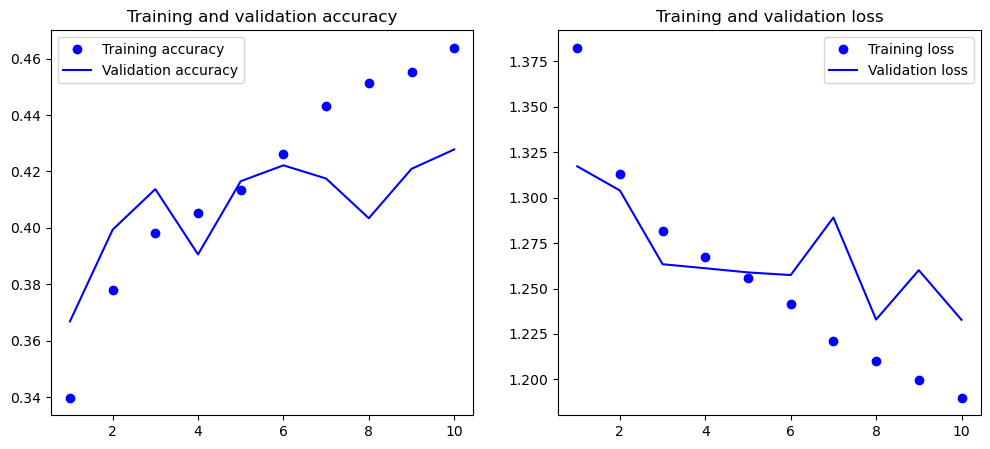

In [49]:
accuracy = history_sar.history['accuracy']
val_accuracy = history_sar.history['val_accuracy']
loss = history_sar.history['loss']
val_loss = history_sar.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
test_loss, test_accuracy = model_sar.evaluate(test_generator_sar)
print(f"Test Loss (Simple Model): {test_loss}")
print(f"Test Accuracy (Simple Model): {test_accuracy}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - accuracy: 0.2834 - loss: 1.3568
Test Loss (Simple Model): 1.2262310981750488
Test Accuracy (Simple Model): 0.44312500953674316


Skrypt do dzielenia dzielenia zbiorów na test, vali i trening.

In [37]:
import os
import shutil
import numpy as np

def split_data(source_dir, train_dir, val_dir, test_dir, train_size=0.7, val_size=0.2):
    classes = [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))]
    
    for cls in classes:
        cls_dir = os.path.join(source_dir, cls)
        images = os.listdir(cls_dir)
        np.random.shuffle(images)
        
        n_total = len(images)
        n_train = int(n_total * train_size)
        n_val = int(n_total * val_size)
        
        train_images = images[:n_train]
        val_images = images[n_train:n_train + n_val]
        test_images = images[n_train + n_val:]
        
        for img in train_images:
            src = os.path.join(cls_dir, img)
            dst = os.path.join(train_dir, cls)
            os.makedirs(dst, exist_ok=True)
            shutil.copy(src, dst)
        
        for img in val_images:
            src = os.path.join(cls_dir, img)
            dst = os.path.join(val_dir, cls)
            os.makedirs(dst, exist_ok=True)
            shutil.copy(src, dst)
        
        for img in test_images:
            src = os.path.join(cls_dir, img)
            dst = os.path.join(test_dir, cls)
            os.makedirs(dst, exist_ok=True)
            shutil.copy(src, dst)

base_dir_optical = r'C:\Users\piotr\Desktop\projekt_WUM_SAR\SAR'

train_dir = os.path.join(base_dir_optical, 'train')
val_dir = os.path.join(base_dir_optical, 'val')
test_dir = os.path.join(base_dir_optical, 'test')

split_data(base_dir_optical, train_dir, val_dir, test_dir)

### REfernetial model for SAR images

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping

simple_sar_model = Sequential([
    Input(shape=(256, 256, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

simple_sar_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history_simple_sar = simple_sar_model.fit(train_generator_sar, validation_data=validation_generator_sar,
                           epochs=10, callbacks=[early_stopping])

Epoch 1/10
350/350 [==============================] - 33s 83ms/step - loss: 6.0634 - accuracy: 0.2488 - val_loss: 2.1702 - val_accuracy: 0.2494
Epoch 2/10
350/350 [==============================] - 17s 50ms/step - loss: 2.0051 - accuracy: 0.2679 - val_loss: 1.8845 - val_accuracy: 0.2684
Epoch 3/10
350/350 [==============================] - 17s 49ms/step - loss: 1.6223 - accuracy: 0.2858 - val_loss: 1.5667 - val_accuracy: 0.2653
Epoch 4/10
350/350 [==============================] - 18s 50ms/step - loss: 1.3961 - accuracy: 0.2661 - val_loss: 1.3888 - val_accuracy: 0.2503
Epoch 5/10
350/350 [==============================] - 18s 50ms/step - loss: 1.3880 - accuracy: 0.2457 - val_loss: 1.3873 - val_accuracy: 0.2500
Epoch 6/10
350/350 [==============================] - 18s 51ms/step - loss: 1.3870 - accuracy: 0.2500 - val_loss: 1.3866 - val_accuracy: 0.2500
Epoch 7/10
350/350 [==============================] - 18s 51ms/step - loss: 1.3866 - accuracy: 0.2478 - val_loss: 1.3864 - val_accuracy:

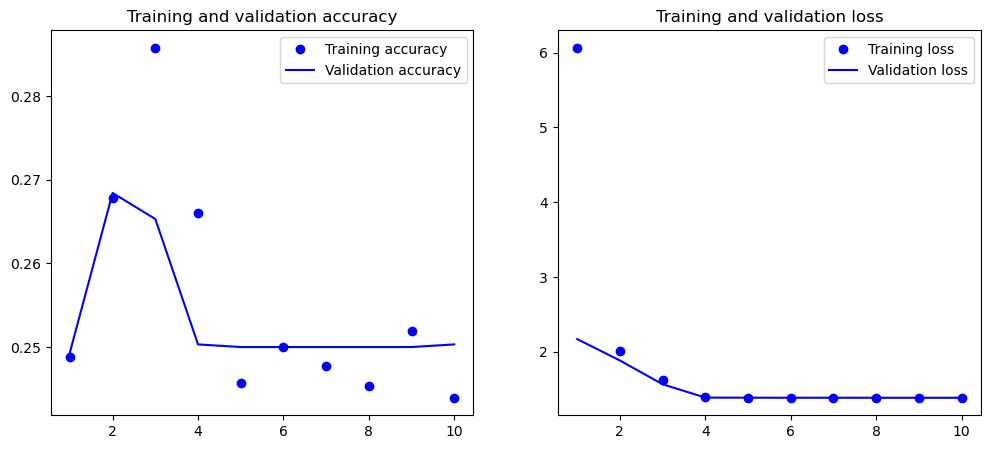

In [9]:
accuracy = history_simple_sar.history['accuracy']
val_accuracy = history_simple_sar.history['val_accuracy']
loss = history_simple_sar.history['loss']
val_loss = history_simple_sar.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
test_loss, test_accuracy = simple_sar_model.evaluate(test_generator_sar)
print(f"Test Loss (Simple Model): {test_loss}")
print(f"Test Accuracy (Simple Model): {test_accuracy}")

50/50 [==============================] - 3s 62ms/step - loss: 1.3863 - accuracy: 0.2512
Test Loss (Simple Model): 1.3862882852554321
Test Accuracy (Simple Model): 0.2512499988079071
